In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
pip install pandas matplotlib seaborn

   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.3 MB 7.2 MB/s eta 0:00:02
   -------- ------------------------------- 2.4/11.3 MB 7.1 MB/s eta 0:00:02
   ------------- -------------------------- 3.9/11.3 MB 6.7 MB/s eta 0:00:02
   ------------------- -------------------- 5.5/11.3 MB 7.0 MB/s eta 0:00:01
   ------------------------ --------------- 6.8/11.3 MB 6.7 MB/s eta 0:00:01
   -------------------------- ------------- 7.6/11.3 MB 6.4 MB/s eta 0:00:01
   ------------------------------ --------- 8.7/11.3 MB 6.0 MB/s eta 0:00:01
   ----------------------------------- ---- 10.0/11.3 MB 6.1 MB/s eta 0:00:01
   -------------------------------------- - 11.0/11.3 MB 5.9 MB/s eta 0:00:01
   ---------------------------------------- 11.3/11.3 MB 5.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 4.8 MB/s eta 0:00:02
   ---------

In [4]:
df = pd.read_csv("turismo_keywords.csv")
df.head()

,usuario,comentario,keywords_detectadas
0,Usuario no disponible,NaN,no_relacionado
1,Usuario no disponible,NaN,no_relacionado
2,Usuario no disponible,Mi carrera sonada,no_relacionado
3,Usuario no disponible,la carrera es muy cara?,no_relacionado
4,Usuario no disponible,que diferencia hay entre ecoturismo y turismo,turismo


In [7]:
df.dropna(subset=['usuario', 'keywords_detectadas'], inplace=True)
df['keywords_detectadas'] = df['keywords_detectadas'].astype(str)

In [8]:
todas_las_palabras = []

for fila in df['keywords_detectadas']:
    palabras = [p.strip().lower() for p in fila.split(',') if p.strip()]
    todas_las_palabras.extend(palabras)

conteo = Counter(todas_las_palabras)
conteo_comun = conteo.most_common(15)
conteo_comun

[('no_relacionado', 104),
 ('informacion', 9),
 ('lugar', 7),
 ('hermoso', 5),
 ('precio', 5),
 ('bonito', 4),
 ('playa', 4),
 ('conocer', 3),
 ('turismo', 2),
 ('costo', 2),
 ('hospedaje', 2),
 ('termales', 2),
 ('hotel', 1),
 ('paseo', 1),
 ('tour', 1)]

C:\Users\colla\AppData\Local\Temp\ipykernel_51916\3580623286.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frecuencias), y=list(palabras), palette="viridis")
C:\Users\colla\AppData\Local\Temp\ipykernel_51916\3580623286.py:11: UserWarning: Glyph 128273 (\N{KEY}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\colla\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128273 (\N{KEY}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


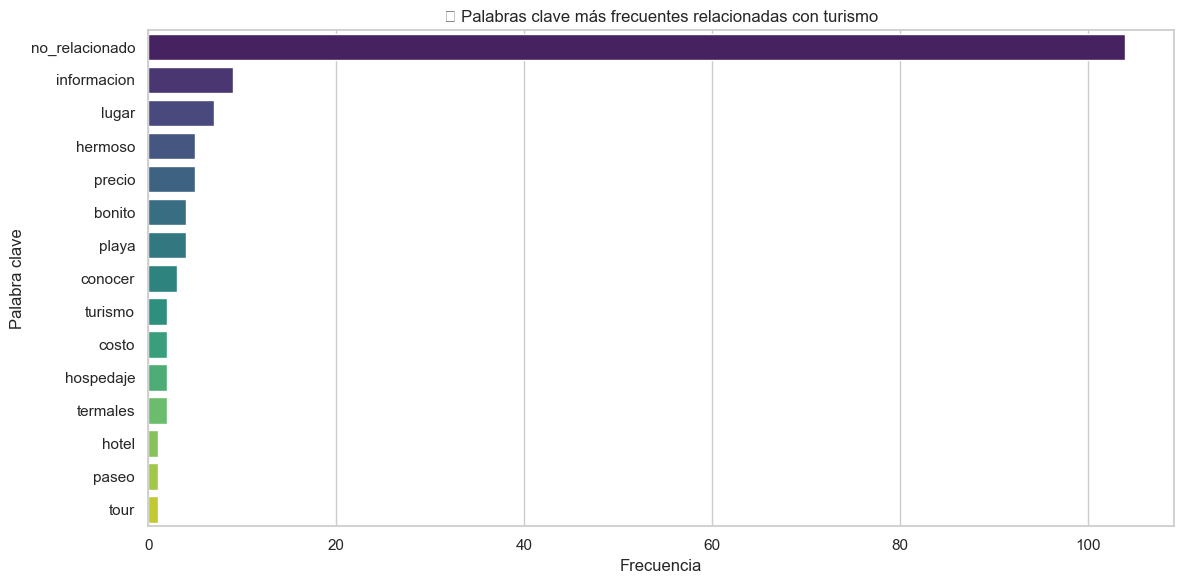

In [9]:
# Preparar datos
palabras, frecuencias = zip(*conteo_comun)

# Estilo gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x=list(frecuencias), y=list(palabras), palette="viridis")
plt.title("🔑 Palabras clave más frecuentes relacionadas con turismo")
plt.xlabel("Frecuencia")
plt.ylabel("Palabra clave")
plt.tight_layout()
plt.show()


In [10]:
!pip install wordcloud

In [11]:
from wordcloud import WordCloud
texto_palabras = ' '.join([
    palabra.strip().lower()
    for fila in df['keywords_detectadas']
    for palabra in fila.split(',')
    if palabra.strip()
])

c:\Users\colla\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9729 (\N{CLOUD}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\colla\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


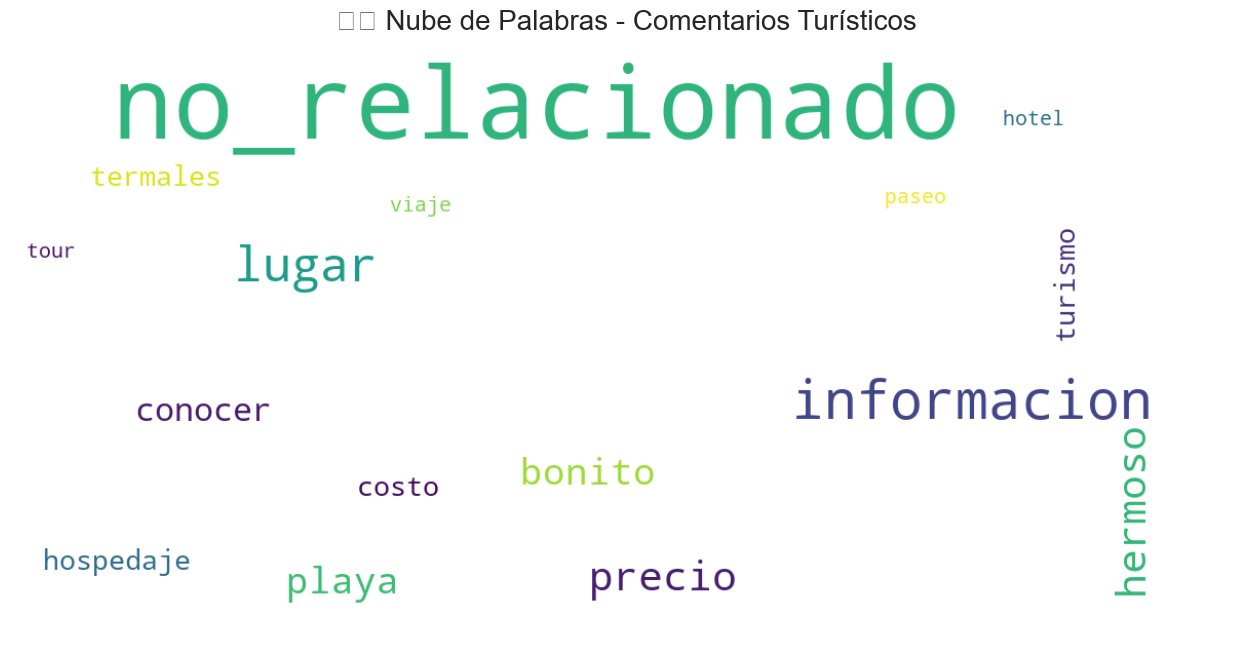

In [12]:
wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    colormap='viridis',
    max_words=200
).generate(texto_palabras)

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("☁️ Nube de Palabras - Comentarios Turísticos", fontsize=20)
plt.show()
